<a href="https://colab.research.google.com/github/ghrahul/ML-DL-PRACTICE/blob/master/poetry_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

data = open('/tmp/irish-lyrics-eof.txt').read()
tokenizer = Tokenizer()
# data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)


--2020-05-09 18:26:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-05-09 18:26:21 (93.2 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, '

In [3]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
  print(f"line: {line}, token_list: {token_list}, input_sequence: {input_sequences}")

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

#the last word of each sentence is the label
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
#one hot encoding of the last word based on whole corpus 
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: never the likes of his logic was heard,, token_list: [49, 1, 1632, 6, 40, 1633, 13, 134], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: from the east to the west., token_list: [27, 1, 1675, 4, 1, 656], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 75, 1220], [1219,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: and loud and clear well raise the cheer, revenge for skibbereen!, token_list: [2, 566, 2, 370, 91, 567, 1, 2181, 2182, 10, 565], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: when lrelands sons and daughters in crowds assembled there, token_list: [21, 2205, 301, 2, 2206, 8, 2207, 2208, 41], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: down a boreen green came a sweet colleen, token_list: [44, 5, 2232, 60, 108, 5, 58, 329], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: thats the gem of irelands crown., token_list: [170, 1, 2242, 6, 2243, 690], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 75, 122

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: you need not go to the market town, token_list: [11, 2452, 54, 50, 4, 1, 2453, 71], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: and his wild harp slung behind him, token_list: [2, 40, 105, 366, 2461, 211, 115], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: the dew on the foreign strand., token_list: [1, 434, 16, 1, 2584, 2585], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 75, 1220],

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: they put me into jail with a judge all a-writin:, token_list: [29, 131, 9, 190, 723, 17, 5, 494, 12, 5, 724], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



line: and the trees are sweetly blooming, token_list: [2, 1, 1146, 31, 745, 361], input_sequence: [[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 75, 122

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation="softmax"))
adam = Adam(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 8s 20ms/step - loss: 6.7367 - accuracy: 0.0658
Epoch 2/100
377/377 [==============================] - 8s 20ms/step - loss: 6.2359 - accuracy: 0.0781
Epoch 3/100
377/377 [==============================] - 8s 20ms/step - loss: 5.9739 - accuracy: 0.0856
Epoch 4/100
377/377 [==============================] - 8s 20ms/step - loss: 5.7029 - accuracy: 0.0993
Epoch 5/100
377/377 [==============================] - 8s 20ms/step - loss: 5.3911 - accuracy: 0.1165
Epoch 6/100
377/377 [==============================] - 8s 20ms/step - loss: 5.0650 - accuracy: 0.1312
Epoch 7/100
377/377 [==============================] - 8s 20ms/step - loss: 4.7350 - accuracy: 0.1473
Epoch 8/100
377/377 [==============================] - 7s 20ms/step - loss: 4.4082 - accuracy: 0.1715
Epoch 9/100
377/377 [==============================] - 7s 20ms/step - loss: 4.0862 - accuracy: 0.2016
Epoch 10/100
377/377 [==============================] - 7s 20ms/step - loss: 3.773

In [13]:
# model = Sequential()
# model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
# model.add(Bidirectional(LSTM(20)))
# model.add(Dense(total_words, activation="softmax"))
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5651 - accuracy: 0.0508
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5318 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 5.4420 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.2451 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 5.1060 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0591 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0270 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9999 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9725 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9398 - accuracy: 0.0508
Epoch 11/

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

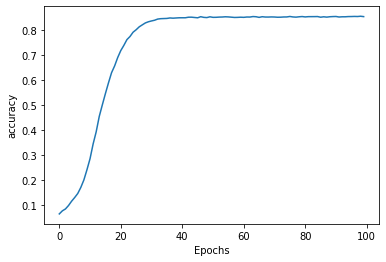

In [7]:
plot_graphs(history, 'accuracy')

In [10]:
# seed_text = "Laurence went to dublin"
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding="pre")
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    # print(f"word: {word}, index: {index}, predicted: {predicted}")
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this stands on drinking see no lassies more laughing part zoo spent tears doneen touch gets ballygrant rent venture venture tailor famine resemble the constant see see powr in killarney odd and learnin and dale it gave english as then i well none springtime again say me gaze oer me were money weak late i goes fairest returned returned and the fair next years more more more on your weirs once loud your rest letters and they was side by daylight by night and they dove near dove bells for tears to smother smother say that thou may able venture to
